In [1]:
import os
from glob import glob
from timeit import default_timer as timer
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

/share/apps/anaconda3/2019.10/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path_to_data='/scratch/spf248/covid/data' 
path_to_fig='/scratch/spf248/covid/fig'    
source='cuebiq'
country='ID'

In [3]:
def get_coords(df):
    df['latitude']=df['point'].apply(lambda x:x['latitude'])
    df['longitude']=df['point'].apply(lambda x:x['longitude'])
    return df.drop('point',1)

# Import Processed Data

In [4]:
print('Import Parquet Files')
start = timer()
data_dir = Path(os.path.join(path_to_data,source,'processed',country,'n_pings_id_day_hour'))
n_pings_id_day_hour = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)
print("Done in", round(timer()-start), "sec") 

Import Parquet Files
Done in 22 sec


In [5]:
print('Import Parquet Files')
start = timer()
data_dir = Path(os.path.join(path_to_data,source,'processed',country,'n_pings_id_personal_day_hour'))
n_pings_id_personal_day_hour = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)
print("Done in", round(timer()-start), "sec") 

Import Parquet Files
Done in 22 sec


In [6]:
print('Import Parquet Files')
start = timer()
data_dir = Path(os.path.join(path_to_data,source,'processed',country,'primary_home'))
primary_home = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)
print("Done in", round(timer()-start), "sec") 

Import Parquet Files
Done in 4 sec


In [7]:
n_pings_id_personal_day_hour=get_coords(n_pings_id_personal_day_hour)
primary_home=get_coords(primary_home)
n_pings_id_home_day_hour=n_pings_id_personal_day_hour.rename(columns={'n_pings':'n_home'}).merge(
primary_home.drop('perfect_match',1),on=['cuebiq_id','latitude','longitude']).merge(
n_pings_id_day_hour,on=['cuebiq_id','dayofweek','hour'])
n_pings_home_hour=n_pings_id_home_day_hour.groupby('hour').agg({'n_home':'sum','n_pings':'sum'})
n_pings_home_hour['pct_home']=n_pings_home_hour.n_home.divide(n_pings_home_hour.n_pings)

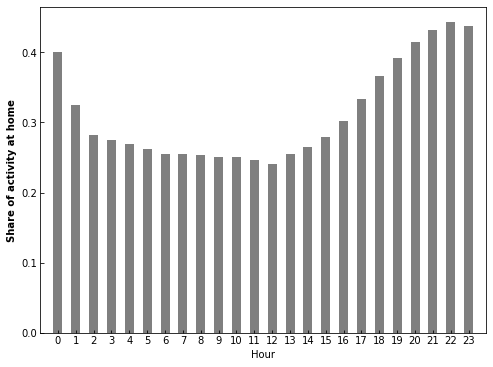

In [10]:
fig,ax=plt.subplots(figsize=(8,6))
n_pings_home_hour.pct_home.plot(ax=ax,kind='bar',color='k',alpha=0.5)
ax.tick_params(which='both',direction='in',pad=3)
ax.locator_params(axis='y',nbins=5)
plt.xticks(rotation=0)
ax.set_xlabel('Hour')
ax.set_ylabel('Share of activity at home',fontweight='bold')
ax.set_xlim([-1,24])
plt.savefig(os.path.join(path_to_fig,country,'home-presence-by-hour.pdf'),bbox_inches='tight')

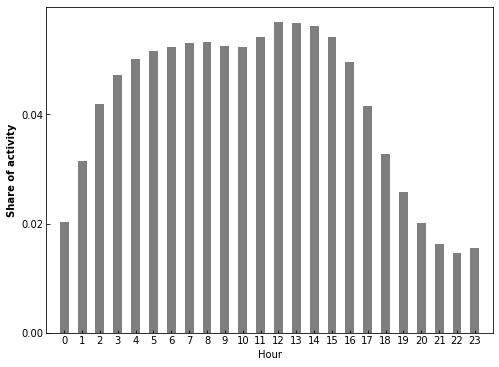

In [25]:
fig,ax=plt.subplots(figsize=(8,6))
(n_pings_id_day_hour.groupby('hour')['n_pings'].sum()/n_pings_id_day_hour.groupby('hour')['n_pings'].sum().sum()).plot(
ax=ax,kind='bar',color='k',alpha=0.5)
ax.tick_params(which='both',direction='in',pad=3)
ax.locator_params(axis='y',nbins=5)
plt.xticks(rotation=0)
ax.set_xlabel('Hour')
ax.set_ylabel('Share of activity',fontweight='bold')
ax.set_xlim([-1,24])
plt.savefig(os.path.join(path_to_fig,country,'home-presence-by-hour.pdf'),bbox_inches='tight')